### Load the Data

In [2]:
# Step 1: Load the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'used_cars.csv' 
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-S

In [4]:
# Display general information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


### Clean the Data

In [5]:
# Step 2: Clean the Data

# Ensure the 'milage' column contains strings and then convert to a numerical value
df['milage'] = df['milage'].astype(str).str.replace(' mi.', '').str.replace(',', '').astype(float)

# Ensure the 'price' column contains strings and then convert to a numerical value
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Fill missing values for categorical columns using assign method
df = df.assign(
    fuel_type=df['fuel_type'].fillna('Unknown'),
    accident=df['accident'].fillna('None reported'),
    clean_title=df['clean_title'].fillna('Unknown')
)

# Display the cleaned dataframe info
print("\nCleaned Dataset Information:")
df.info()
print("\nCleaned Data Preview:")
print(df.head())


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB

Cleaned Data Preview:
      brand                            model  model_year   milage  \
0      Ford  Utility Police Interceptor Base        2013  51000.0   
1   Hyundai                     Pali

#### Explore the Data

In [6]:
# Describe numerical columns
print("\nNumerical Data Description:")
print(df.describe())

# Describe categorical columns
print("\nCategorical Data Description:")
print(df.describe(include=['object']))


Numerical Data Description:
        model_year         milage         price
count  4009.000000    4009.000000  4.009000e+03
mean   2015.515590   64717.551010  4.455319e+04
std       6.104816   52296.599459  7.871064e+04
min    1974.000000     100.000000  2.000000e+03
25%    2012.000000   23044.000000  1.720000e+04
50%    2017.000000   52775.000000  3.100000e+04
75%    2020.000000   94100.000000  4.999000e+04
max    2024.000000  405000.000000  2.954083e+06

Categorical Data Description:
       brand    model fuel_type                      engine transmission  \
count   4009     4009      4009                        4009         4009   
unique    57     1898         8                        1146           62   
top     Ford  M3 Base  Gasoline  2.0L I4 16V GDI DOHC Turbo          A/T   
freq     386       30      3309                          52         1037   

       ext_col int_col       accident clean_title  
count     4009    4009           4009        4009  
unique     319     156 

### Visualize the Data

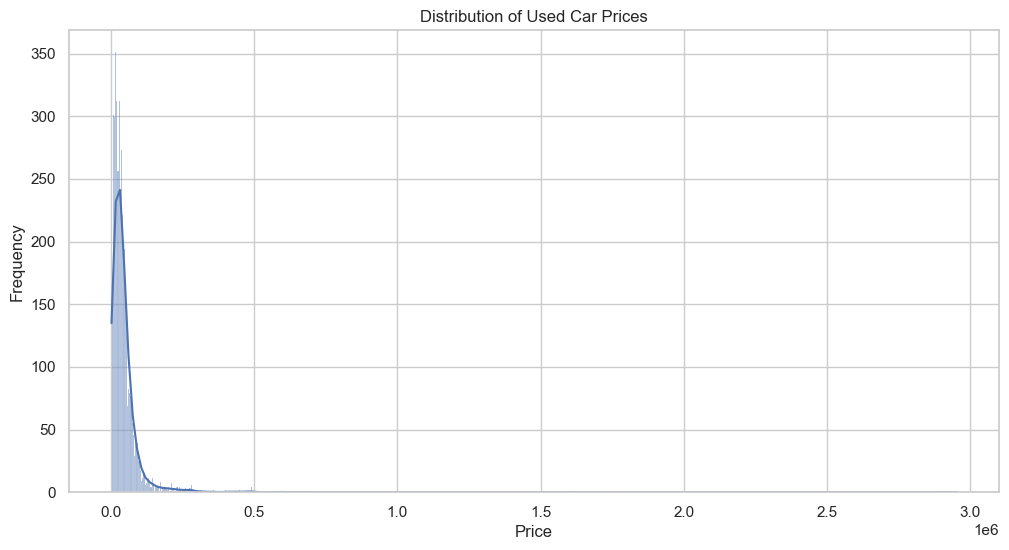

In [7]:
sns.set(style="whitegrid")

# Plot distribution of 'price'
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Used Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

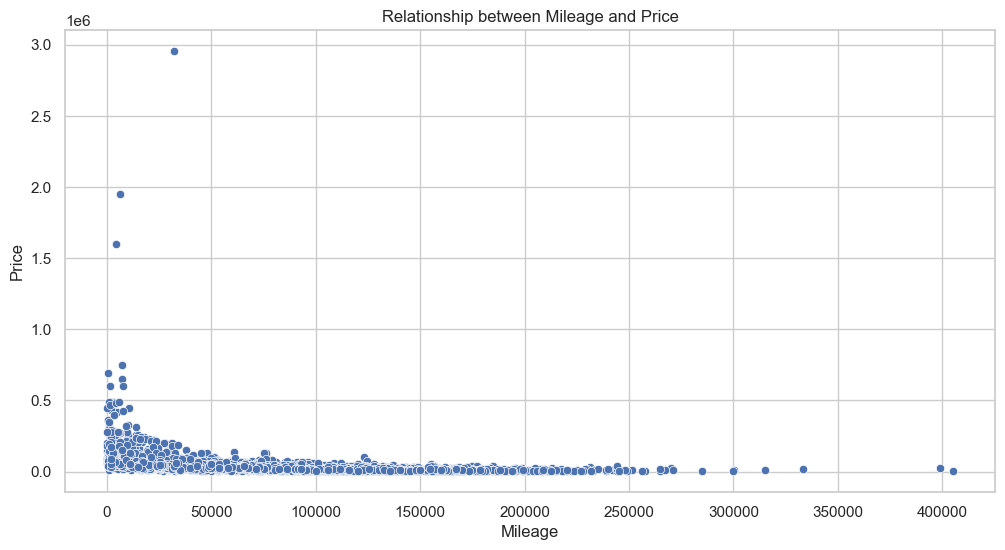

In [8]:
# Plot relationship between 'milage' and 'price'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='milage', y='price', data=df)
plt.title("Relationship between Mileage and Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

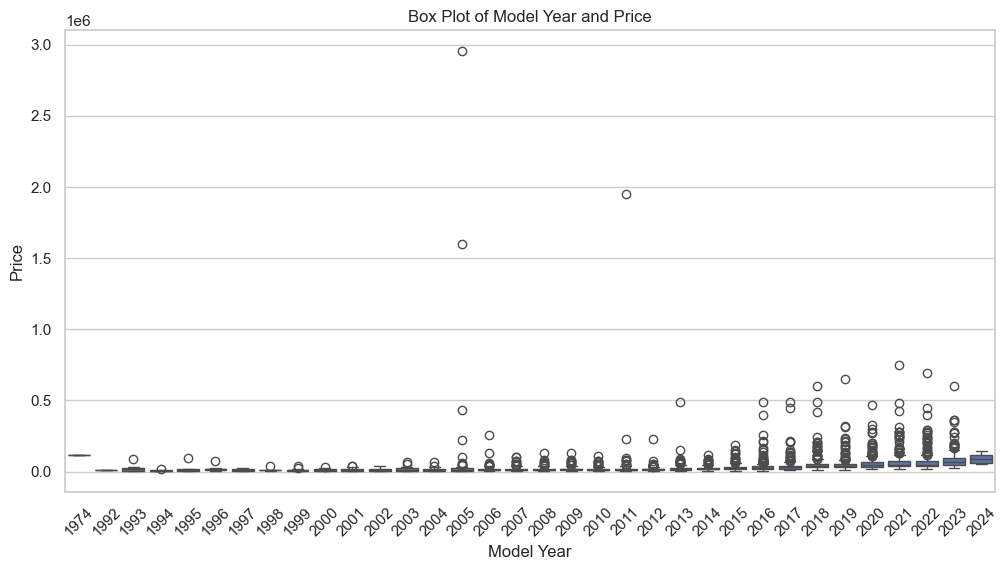

In [9]:
# Plot relationship between 'model_year' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_year', y='price', data=df)
plt.title("Box Plot of Model Year and Price")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

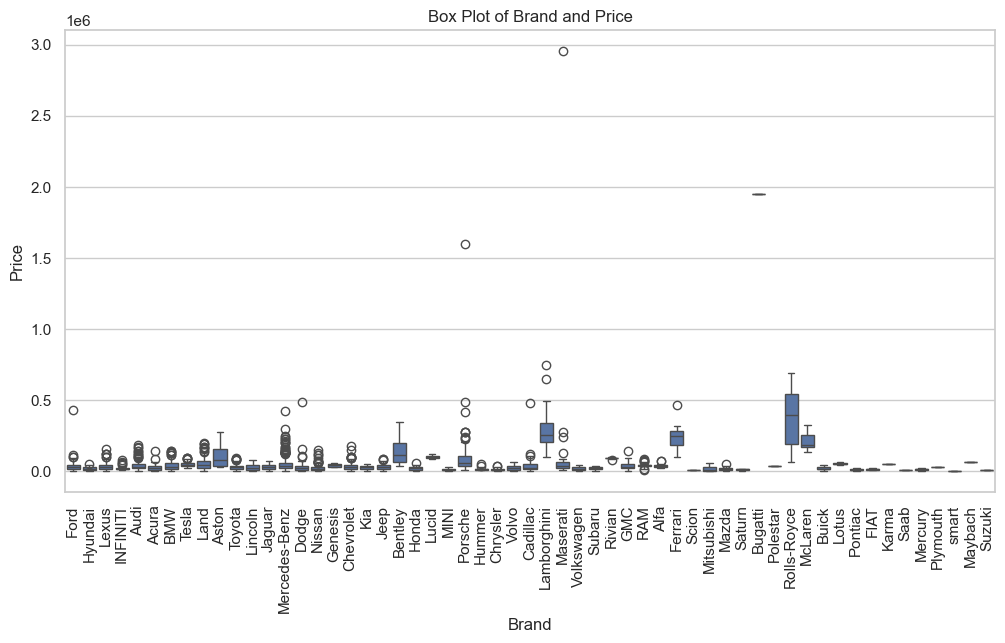

In [10]:
# Plot the relationship between 'brand' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.title("Box Plot of Brand and Price")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

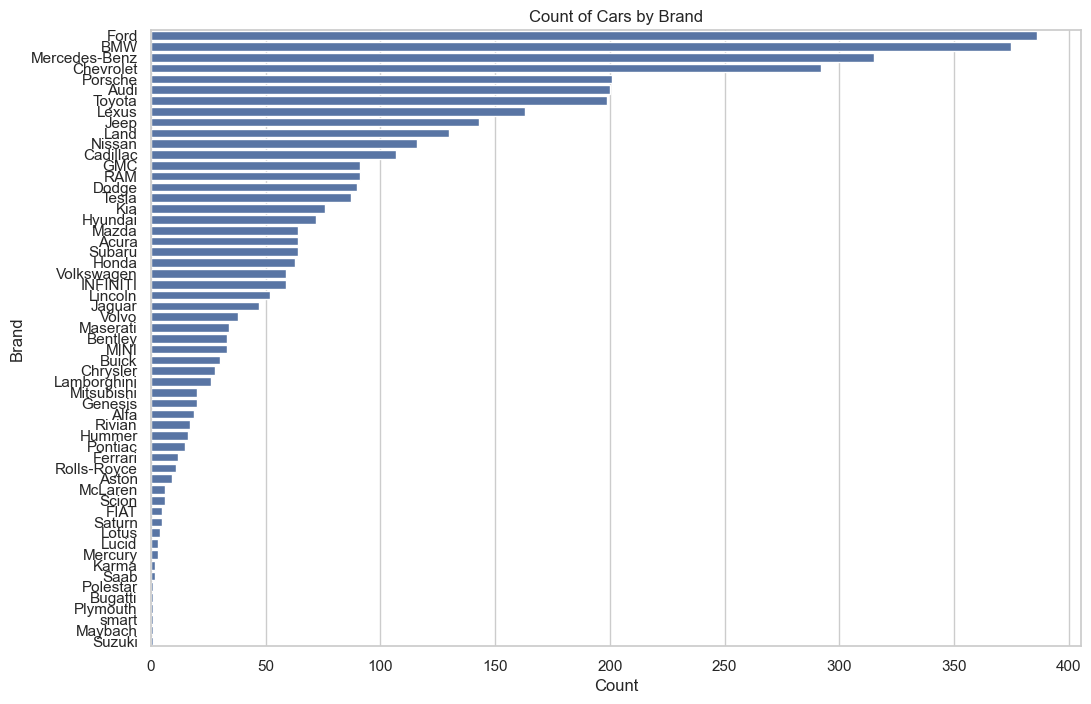

In [11]:
# Count of cars by brand
plt.figure(figsize=(12, 8))
sns.countplot(y='brand', data=df, order = df['brand'].value_counts().index)
plt.title('Count of Cars by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

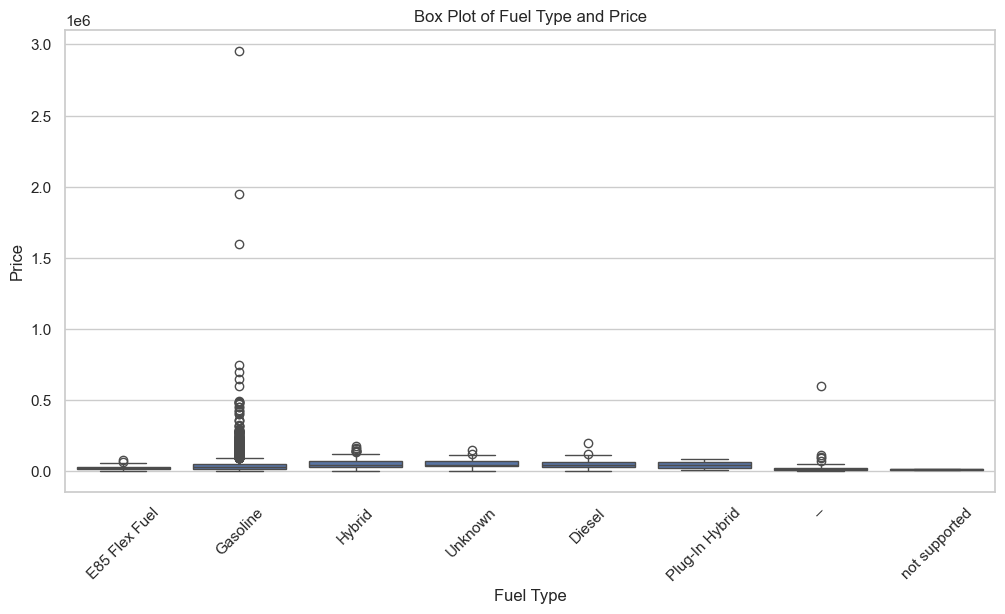

In [12]:
# Plot the relationship between 'fuel_type' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title("Box Plot of Fuel Type and Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

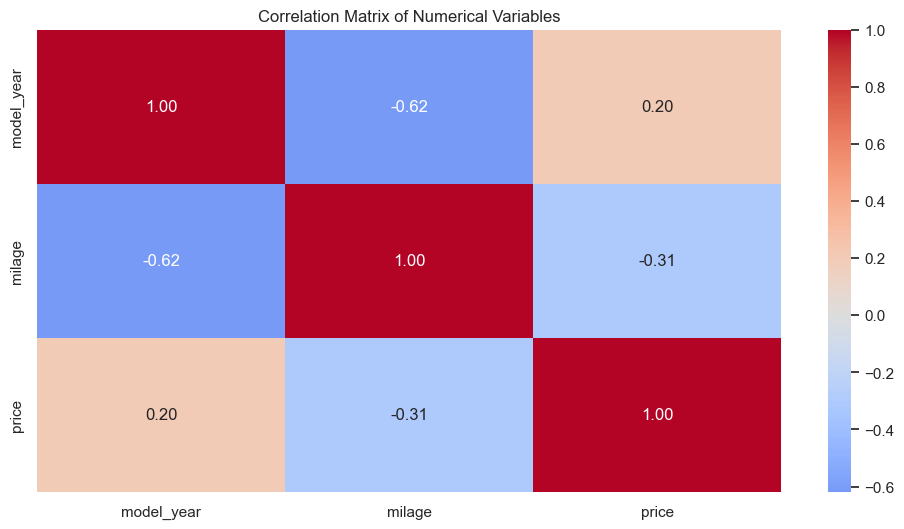

In [17]:
# Plot correlation matrix for numerical columns only
plt.figure(figsize=(12, 6))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

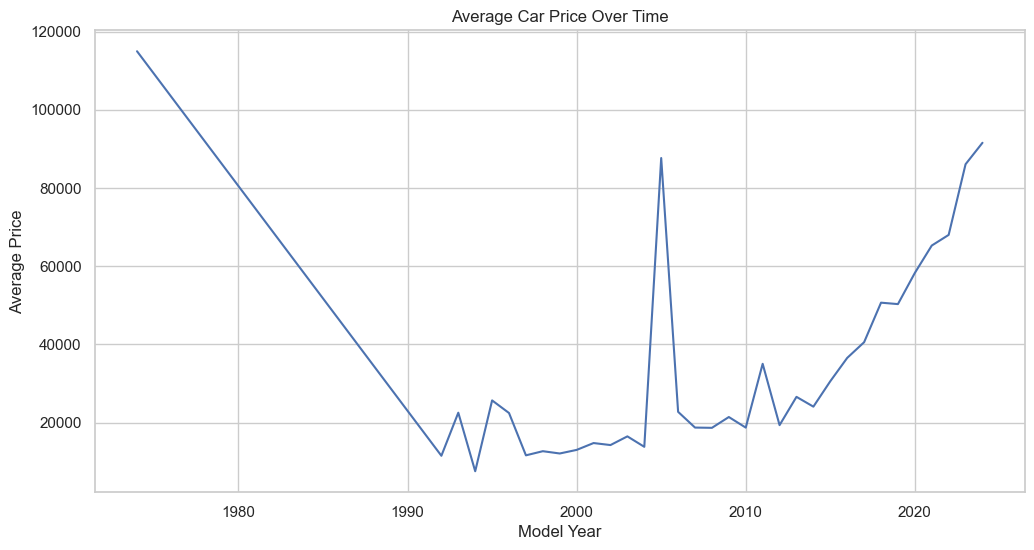

In [18]:
# Plot time series of 'model_year' and 'price'
plt.figure(figsize=(12, 6))
sns.lineplot(x='model_year', y='price', data=df.groupby('model_year')['price'].mean().reset_index())
plt.title("Average Car Price Over Time")
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.show()

<Figure size 1200x600 with 0 Axes>

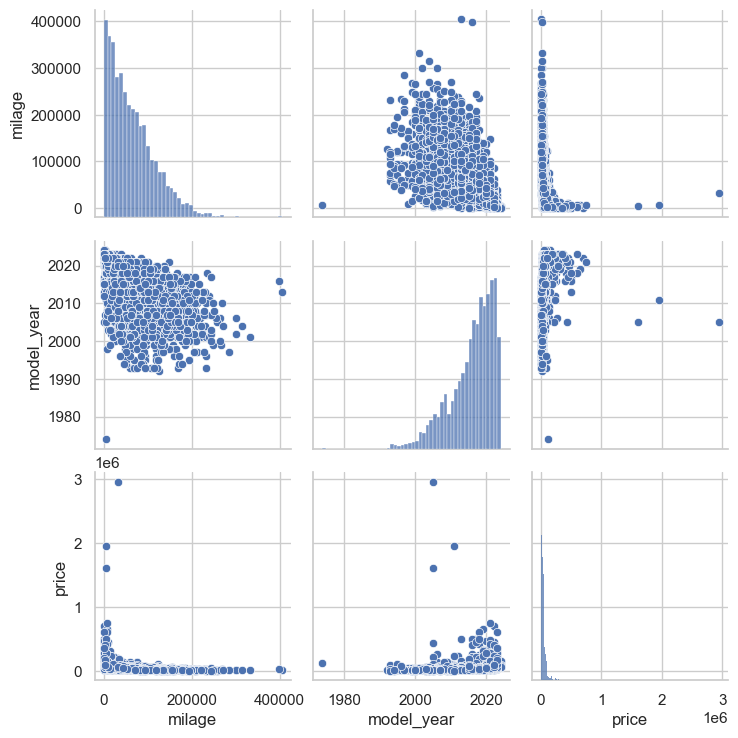

In [19]:
# Plot pairplot for numerical columns
plt.figure(figsize=(12, 6))
sns.pairplot(df, vars=['milage', 'model_year', 'price'])
plt.show()

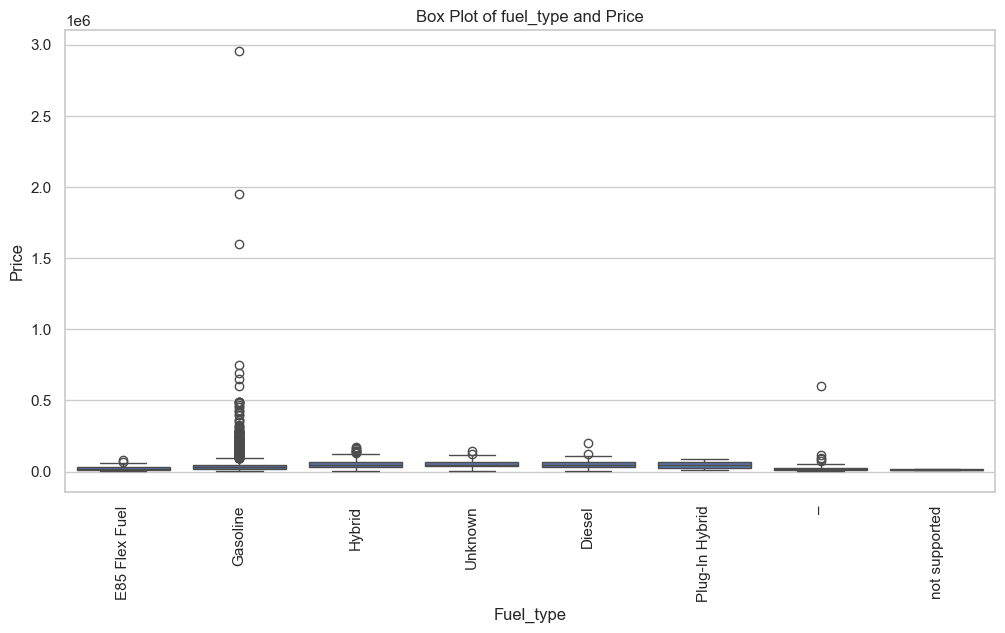

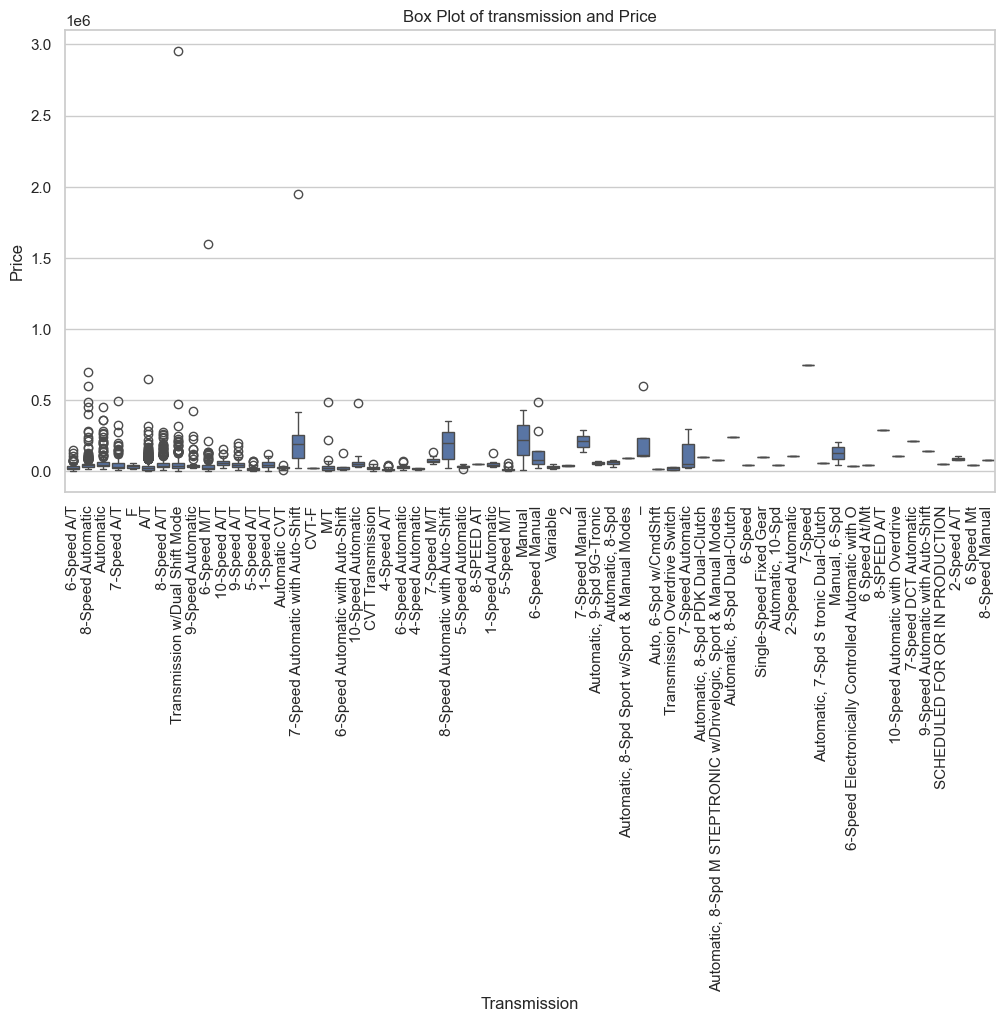

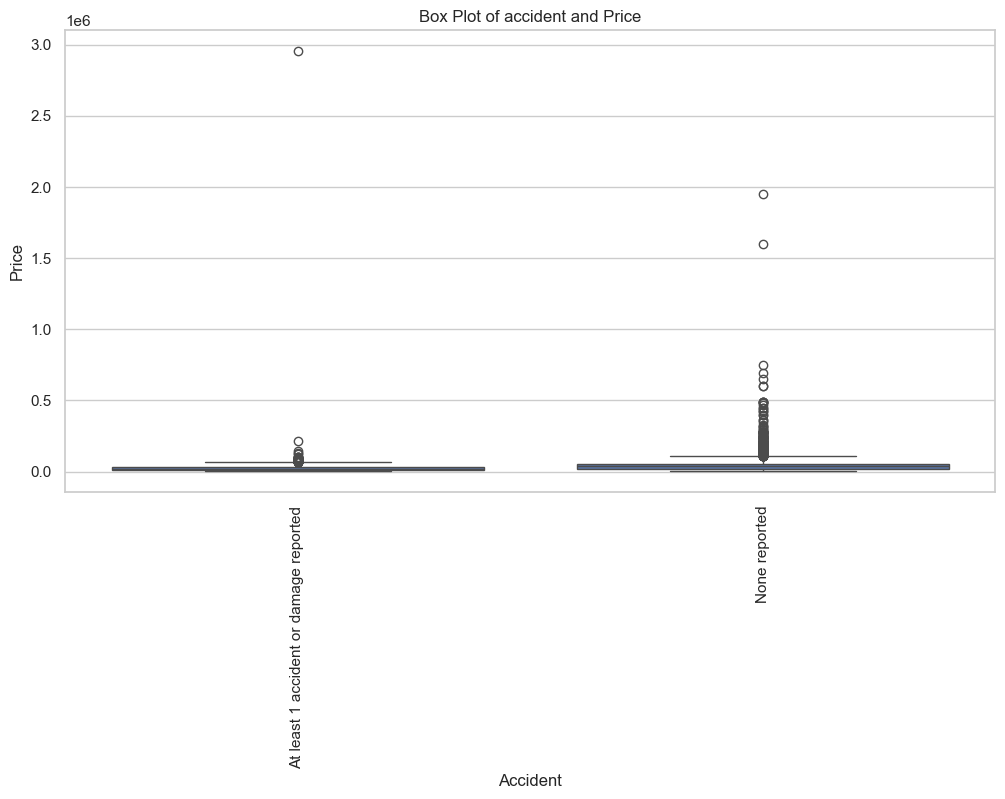

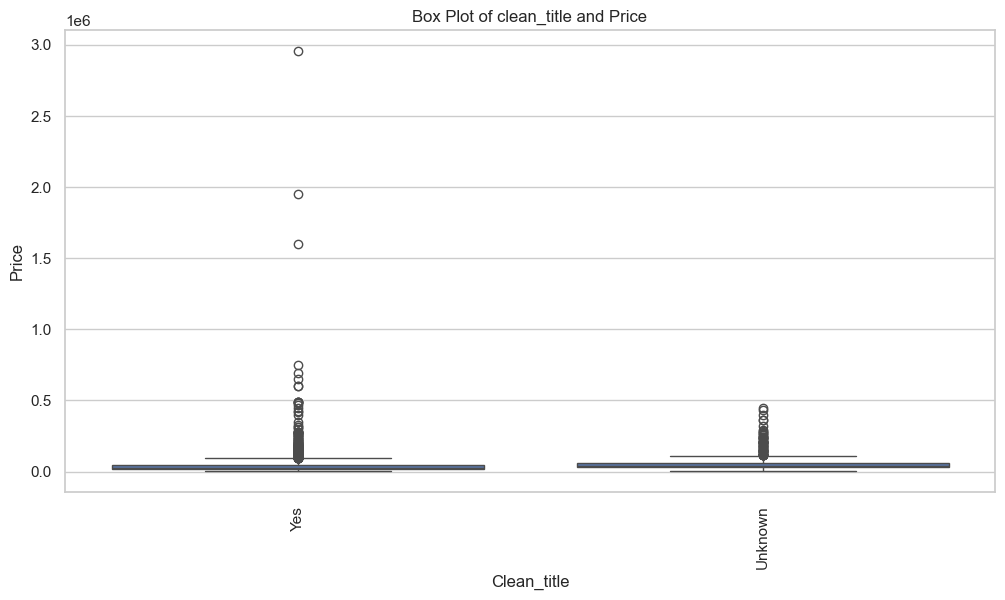

In [20]:
# Plot categorical plots
categorical_columns = ['fuel_type', 'transmission', 'accident', 'clean_title']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f"Box Plot of {column} and Price")
    plt.xlabel(column.capitalize())
    plt.ylabel("Price")
    plt.xticks(rotation=90)
    plt.show()

### Feature Engineering

In [22]:
# Step 5: Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Select relevant features
X = df[['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission', 
        'ext_col', 'int_col', 'accident', 'clean_title']]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column types
categorical_columns = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
numerical_columns = ['model_year', 'milage']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Create and fit the pipeline on training data
model_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the model pipeline
X_train_transformed = model_pipeline.fit_transform(X_train)

# Apply transformation to the test set
X_test_transformed = model_pipeline.transform(X_test)

In [23]:
# Display the transformed feature matrix for training set
print("\nTransformed Training Set Shape:", X_train_transformed.shape)
print("\nTransformed Testing Set Shape:", X_test_transformed.shape)


Transformed Training Set Shape: (3207, 2170)

Transformed Testing Set Shape: (802, 2170)


In [24]:
# Display feature names
feature_names = numerical_columns + list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
print("\nFeature Names:")
print(feature_names)


Feature Names:
['model_year', 'milage', 'brand_Acura', 'brand_Alfa', 'brand_Aston', 'brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Buick', 'brand_Cadillac', 'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge', 'brand_FIAT', 'brand_Ferrari', 'brand_Ford', 'brand_GMC', 'brand_Genesis', 'brand_Honda', 'brand_Hummer', 'brand_Hyundai', 'brand_INFINITI', 'brand_Jaguar', 'brand_Jeep', 'brand_Karma', 'brand_Kia', 'brand_Lamborghini', 'brand_Land', 'brand_Lexus', 'brand_Lincoln', 'brand_Lotus', 'brand_Lucid', 'brand_MINI', 'brand_Maserati', 'brand_Maybach', 'brand_Mazda', 'brand_McLaren', 'brand_Mercedes-Benz', 'brand_Mercury', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Plymouth', 'brand_Polestar', 'brand_Pontiac', 'brand_Porsche', 'brand_RAM', 'brand_Rivian', 'brand_Rolls-Royce', 'brand_Saab', 'brand_Saturn', 'brand_Scion', 'brand_Subaru', 'brand_Suzuki', 'brand_Tesla', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'brand_smart', 'model_124 Spider Abarth', 'model_128 i', 'model_135 i'

### Data Transformation

In [25]:
# Step 7: Data Transformation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Displaying the top 10 features based on absolute value of coefficients
feature_importances = abs(model.coef_)
feature_names = numerical_columns + list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
top_10_features = sorted(zip(feature_importances, feature_names), reverse=True)[:10]

print("\nTop 10 Important Features:")
for importance, name in top_10_features:
    print(f"{name}: {importance:.2f}")



Model Evaluation:
Mean Squared Error: 19346671462.75
Root Mean Squared Error: 139092.31
R-squared: 0.05

Top 10 Important Features:
model_Aventador SVJ Base: 376349.20
int_col_Brandy: 370523.92
model_911 GT2 RS: 334087.59
brand_Rolls-Royce: 292759.68
int_col_Black / Brown: 273549.07
model_Phantom: 259366.29
ext_col_China Blue: 247867.89
model_Ghost Base: 237315.67
model_812 Superfast Base: 234577.72
model_Aventador S Base: 229001.42


### Model Building

#### Model Building with Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_transformed, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test_transformed)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Model Evaluation:")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"Root Mean Squared Error: {rmse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")

# Plot the feature importance
feature_importances_dt = decision_tree.feature_importances_
feature_names = numerical_columns + list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
top_10_features_dt = sorted(zip(feature_importances_dt, feature_names), reverse=True)[:10]

# Display top 10 important features
print("\nTop 10 Important Features for Decision Tree:")
for importance, name in top_10_features_dt:
    print(f"{name}: {importance:.2f}")


Decision Tree Model Evaluation:
Mean Squared Error: 18864615486.83
Root Mean Squared Error: 137348.52
R-squared: 0.08

Top 10 Important Features for Decision Tree:
milage: 0.31
brand_Lamborghini: 0.13
brand_Rolls-Royce: 0.12
brand_Ferrari: 0.05
model_year: 0.04
brand_Porsche: 0.04
model_Aventador SVJ Base: 0.03
brand_Bentley: 0.03
int_col_Brandy: 0.02
ext_col_Black: 0.02


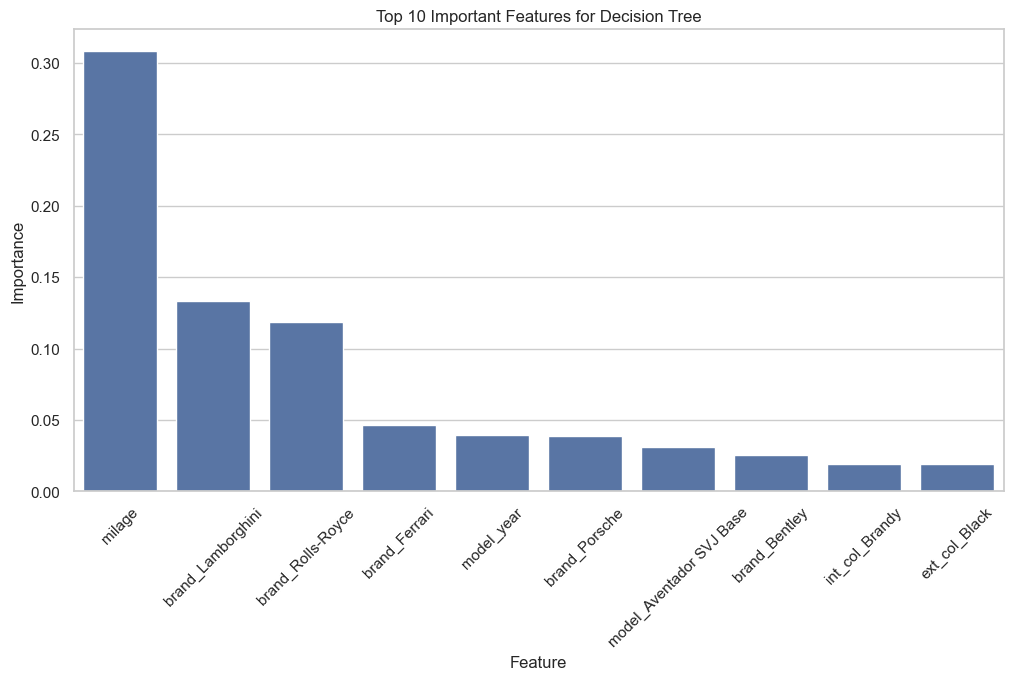

In [38]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=[name for _, name in top_10_features_dt], y=[importance for importance, _ in top_10_features_dt])
plt.title("Top 10 Important Features for Decision Tree")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

#### Model Building with Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_transformed, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test_transformed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

# Plot the feature importance
feature_importances_rf = random_forest.feature_importances_
feature_names = numerical_columns + list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
top_10_features_rf = sorted(zip(feature_importances_rf, feature_names), reverse=True)[:10]

# Display top 10 important features
print("\nTop 10 Important Features for Random Forest:")
for importance, name in top_10_features_rf:
    print(f"{name}: {importance:.2f}")


Random Forest Model Evaluation:
Mean Squared Error: 18072435875.37
Root Mean Squared Error: 134433.76
R-squared: 0.12

Top 10 Important Features for Random Forest:
milage: 0.31
brand_Lamborghini: 0.12
brand_Rolls-Royce: 0.10
brand_Ferrari: 0.04
model_Aventador SVJ Base: 0.04
model_year: 0.03
brand_Porsche: 0.03
brand_Bentley: 0.03
int_col_Brandy: 0.02
transmission_7-Speed Automatic with Auto-Shift: 0.02


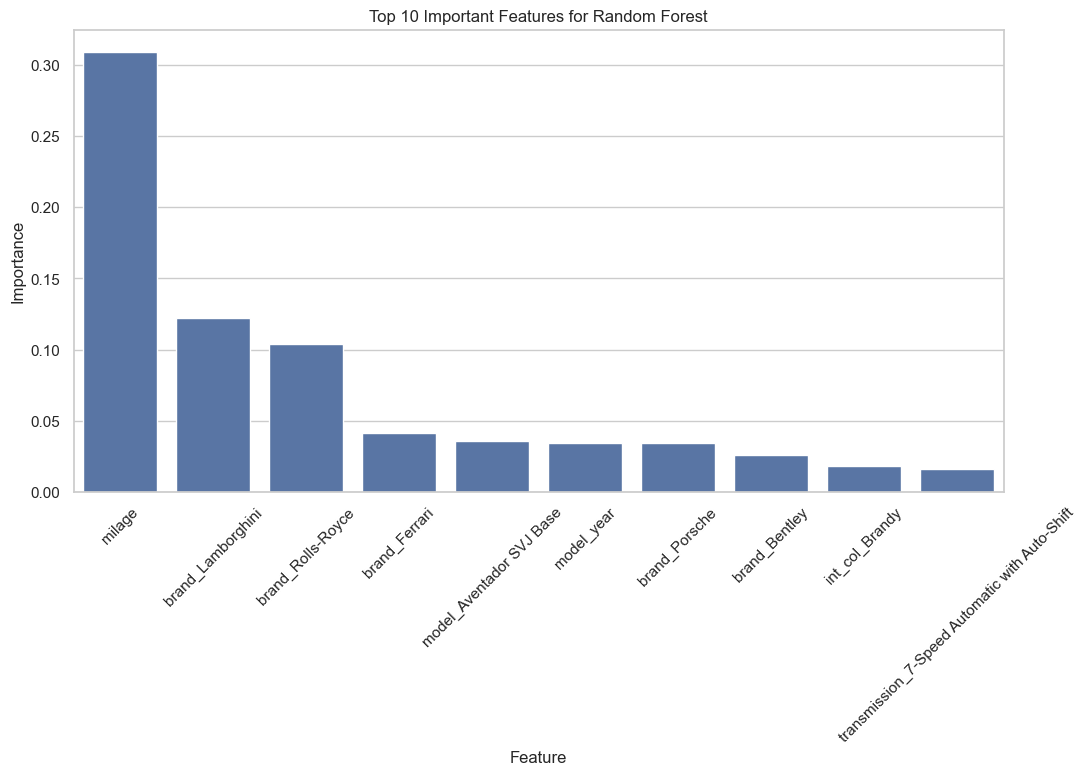

In [36]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=[name for _, name in top_10_features_rf], y=[importance for importance, _ in top_10_features_rf])
plt.title("Top 10 Important Features for Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

#### Model Building with Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes model
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_transformed.toarray(), y_train)  # toarray() because GaussianNB doesn't work with sparse matrices

# Make predictions
y_pred_gnb = gaussian_nb.predict(X_test_transformed.toarray())

# Evaluate the model
mse_gnb = mean_squared_error(y_test, y_pred_gnb)
rmse_gnb = np.sqrt(mse_gnb)
r2_gnb = r2_score(y_test, y_pred_gnb)

print("\nGaussian Naive Bayes Model Evaluation:")
print(f"Mean Squared Error: {mse_gnb:.2f}")
print(f"Root Mean Squared Error: {rmse_gnb:.2f}")
print(f"R-squared: {r2_gnb:.2f}")


Gaussian Naive Bayes Model Evaluation:
Mean Squared Error: 19643155186.20
Root Mean Squared Error: 140154.04
R-squared: 0.04


#### Support Vector Machine (SVM)

In [33]:
from sklearn.svm import SVR

# Initialize and train the Support Vector Machine model
svm = SVR(kernel='linear')
svm.fit(X_train_transformed, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_transformed)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("\nSupport Vector Machine Model Evaluation:")
print(f"Mean Squared Error: {mse_svm:.2f}")
print(f"Root Mean Squared Error: {rmse_svm:.2f}")
print(f"R-squared: {r2_svm:.2f}")

# Convert sparse matrix to dense and get absolute values of the coefficients
feature_importances_svm = abs(svm.coef_.toarray()[0])
feature_names = numerical_columns + list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
top_10_features_svm = sorted(zip(feature_importances_svm, feature_names), reverse=True)[:10]

# Display top 10 important features
print("\nTop 10 Important Features for SVM:")
for importance, name in top_10_features_svm:
    print(f"{name}: {importance:.2f}")


Support Vector Machine Model Evaluation:
Mean Squared Error: 20699337903.58
Root Mean Squared Error: 143872.64
R-squared: -0.01

Top 10 Important Features for SVM:
milage: 1747.65
model_year: 1609.19
accident_None reported: 308.00
accident_At least 1 accident or damage reported: 308.00
transmission_A/T: 236.00
clean_title_Yes: 198.00
clean_title_Unknown: 198.00
int_col_Beige: 155.00
int_col_Gray: 142.00
fuel_type_Gasoline: 138.00


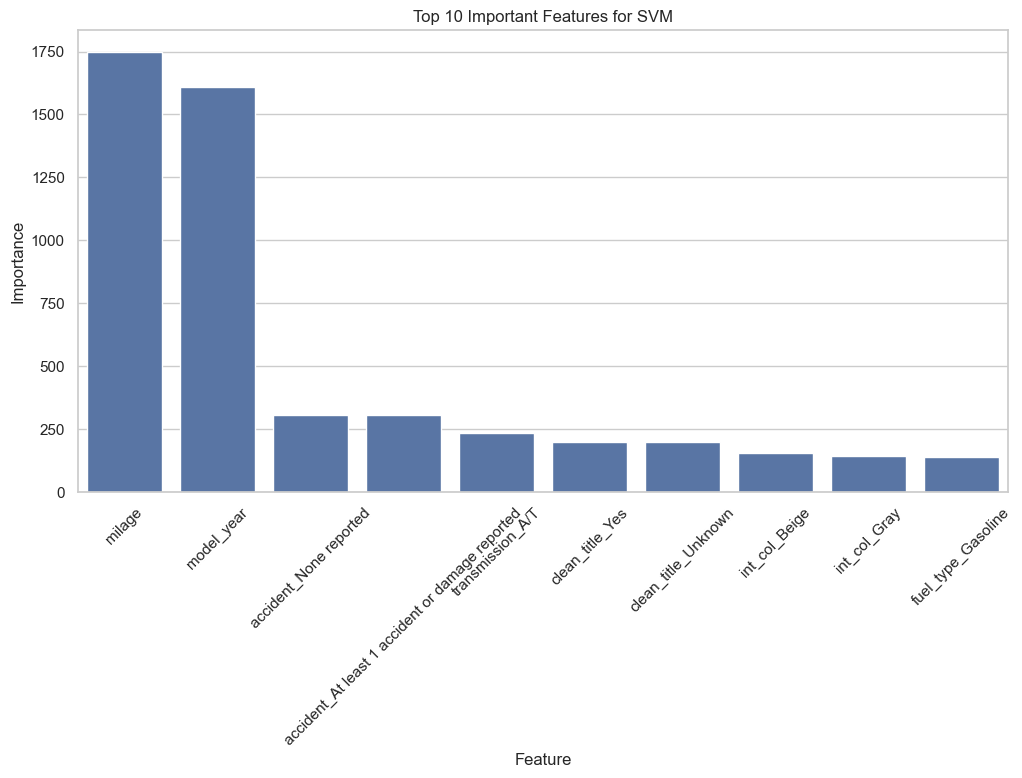

In [34]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=[name for _, name in top_10_features_svm], y=[importance for importance, _ in top_10_features_svm])
plt.title("Top 10 Important Features for SVM")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

### Model Evaluation 


Model: Decision Tree
Mean Squared Error: 18864615486.83
Root Mean Squared Error: 137348.52
R-squared: 0.08

Model: Random Forest
Mean Squared Error: 18072435875.37
Root Mean Squared Error: 134433.76
R-squared: 0.12

Model: Naive Bayes
Mean Squared Error: 19643155186.20
Root Mean Squared Error: 140154.04
R-squared: 0.04

Model: SVM
Mean Squared Error: 20699337903.58
Root Mean Squared Error: 143872.64
R-squared: -0.01

Model Evaluation Summary:
                        MSE           RMSE  R-squared
Decision Tree  1.886462e+10  137348.518328   0.077054
Random Forest  1.807244e+10  134433.760177   0.115811
Naive Bayes    1.964316e+10  140154.040920   0.038964
SVM            2.069934e+10  143872.644737  -0.012709


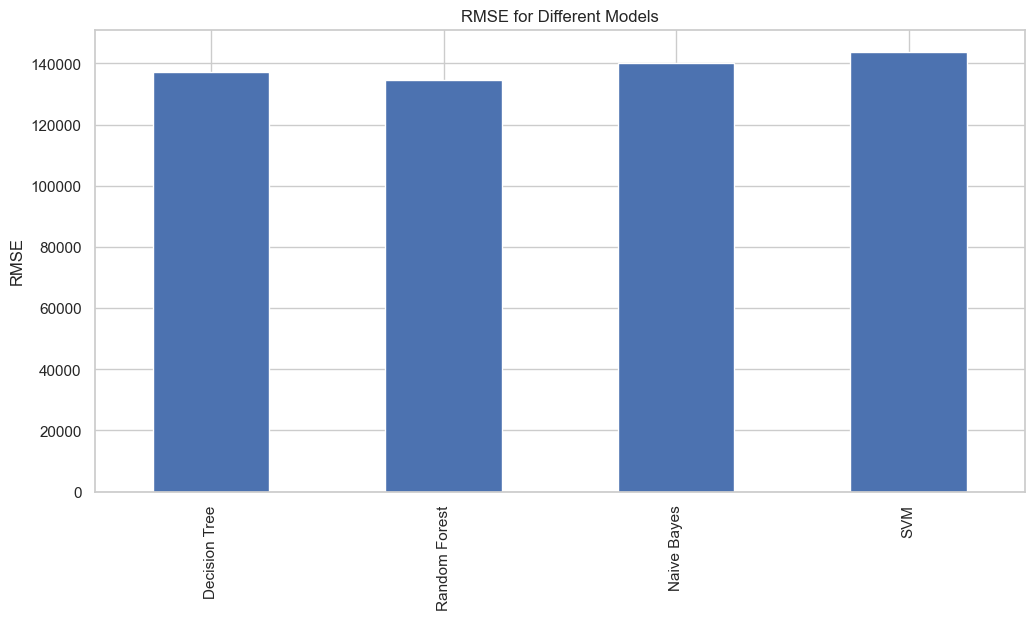

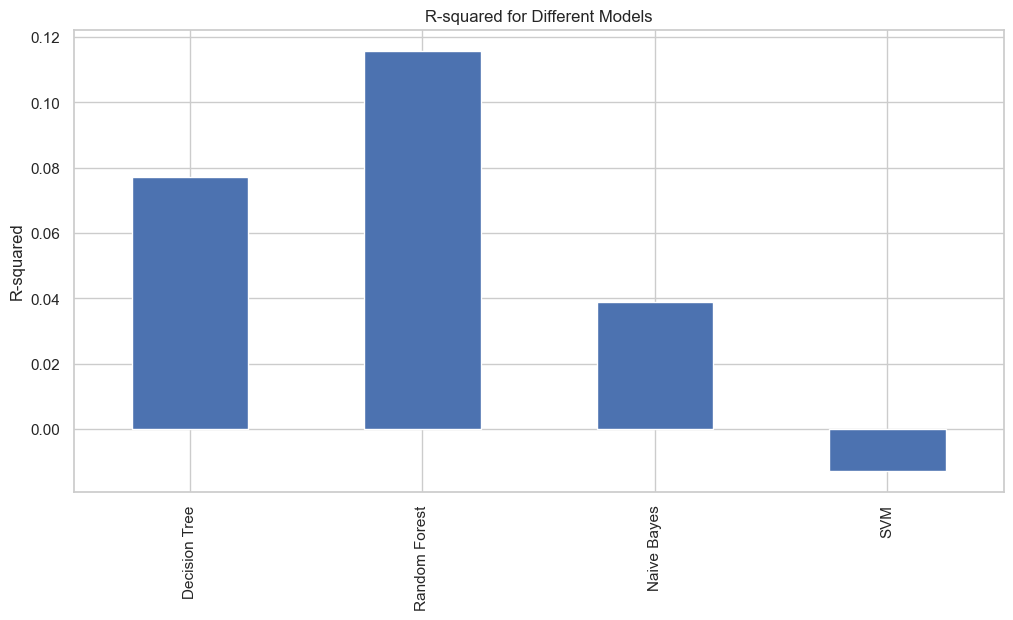

In [40]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVR(kernel='linear')
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    if model_name == "Naive Bayes":  # Convert to dense format for Naive Bayes
        model.fit(X_train_transformed.toarray(), y_train)
        y_pred = model.predict(X_test_transformed.toarray())
    else:  # Fit normally for other models
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "RMSE": rmse, "R-squared": r2}
    print(f"\nModel: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Summary:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
results_df['RMSE'].plot(kind='bar')
plt.title("RMSE for Different Models")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(12, 6))
results_df['R-squared'].plot(kind='bar')
plt.title("R-squared for Different Models")
plt.ylabel("R-squared")
plt.show()